In [2]:
%pip install pandas numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
path = 'C:/Falguni Sharma/sentiment_tweets3/sentiment_tweets3.csv'

In [5]:
df=pd.read_csv(path)

#text preprocessing

In [6]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [7]:
df['label (depression result)'].value_counts()

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

In [8]:
#As there are uneven dataset lets take equal 0's and 1's
selected_rows0 = df[df['label (depression result)'] == 0].head(2314)
selected_rows1 = df[df['label (depression result)'] == 1].head(2314)

In [9]:
selected_rows0.value_counts

<bound method DataFrame.value_counts of        Index                                 message to examine  \
0        106  just had a real good moment. i missssssssss hi...   
1        217         is reading manga  http://plurk.com/p/mzp1e   
2        220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3        288  @lapcat Need to send 'em to my accountant tomo...   
4        540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...      ...                                                ...   
2309  235935  my BIS connection is KapuT, no BBM, feels lonely    
2310  236037  I love how non-chalant &amp; blunt Tony Montan...   
2311  236412  Glad to have gotten outta bed  on my way back ...   
2312  236419  @FRin323 none of that!! I can't wait!!!  so wh...   
2313  236420                  @brendax &lt;333333333 love you!    

      label (depression result)  
0                             0  
1                             0  
2                             0  
3                  

In [10]:
#Combining dataset
combined_df = pd.concat([selected_rows1,selected_rows0], ignore_index=True)
combined_df.head()

,Index,message to examine,label (depression result)
0,800000,The lack of this understanding is a small but ...,1
1,800001,i just told my parents about my depression and...,1
2,800002,depression is something i don't speak about ev...,1
3,800003,Made myself a tortilla filled with pb&j. My de...,1
4,800004,@WorldofOutlaws I am gonna need depression med...,1


In [11]:
combined_df['label (depression result)'].value_counts()

label (depression result)
1    2314
0    2314
Name: count, dtype: int64

In [12]:
combined_df.head()

,Index,message to examine,label (depression result)
0,800000,The lack of this understanding is a small but ...,1
1,800001,i just told my parents about my depression and...,1
2,800002,depression is something i don't speak about ev...,1
3,800003,Made myself a tortilla filled with pb&j. My de...,1
4,800004,@WorldofOutlaws I am gonna need depression med...,1


In [13]:
combined_df.loc[0]['message to examine']

"The lack of this understanding is a small but significant part of what causes anxiety & depression to both feel so incredibly lonely. It's soooo easy to compare. It's so easy to invalidate ourselves because of that."

In [14]:
#cleaning messages

In [15]:
combined_df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [16]:
#function to check if there are just numbers or invalid data in messsage coloumn
for i in combined_df['message to examine']:
    for j in i.split():
        if j.isdigit():
            s="yes"
        else:
            s="no"  
print(s)              

no


In [17]:
import re

In [18]:
# First Remove all the numbers

def remove_numbers(text):
  return ' '.join([i for i in str(text).split() if not i.isdigit()])

combined_df['WithoutDigit'] = combined_df['message to examine'].apply(lambda x: remove_numbers(x))


In [19]:
combined_df


,Index,message to examine,label (depression result),WithoutDigit
0,800000,The lack of this understanding is a small but ...,1,The lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,Made myself a tortilla filled with pb&j. My de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@WorldofOutlaws I am gonna need depression med...
...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my BIS connection is KapuT, no BBM, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,I love how non-chalant &amp; blunt Tony Montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,Glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@FRin323 none of that!! I can't wait!!! so whe...


In [22]:
# Lowercasing all the tweets

combined_df['WithoutDigit'] = combined_df['WithoutDigit'].str.lower()
combined_df

,Index,message to examine,label (depression result),WithoutDigit
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...
...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...


In [23]:
# Removal of Weblinks

def remove_weblinks(text):
  return re.sub(r"http\S+", "", text)

combined_df['WithoutWeblinks'] = combined_df['WithoutDigit'].apply(lambda x: remove_weblinks(x))

In [24]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...
...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...


In [25]:
#Removing twitter mentions
def remove_twitter(text):
  return re.sub('@[\w]+','',text)
combined_df['WithoutMentions'] = combined_df['WithoutWeblinks'].apply(lambda x:remove_twitter(x))

In [26]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks,WithoutMentions
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r..."
...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...


In [27]:
import string

In [28]:
def remove_punctuation(text):
    return text.translate((str.maketrans('','', string.punctuation)))
combined_df['WithoutPunctuations'] = combined_df['WithoutMentions'].apply(lambda x:remove_punctuation(x))

In [29]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks,WithoutMentions,WithoutPunctuations
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...
...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day


In [32]:
%pip install nltk
import nltk
nltk.download('stopwords')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typer 0.12.3 requires rich>=10.11.0, which is not installed.
typer 0.12.3 requires shellingham>=1.3.0, which is not installed.


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 503.7 kB/s eta 0:00:00
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 5.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 9.1 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 6.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fshar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [34]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
combined_df['WithoutStopwords'] = combined_df['WithoutPunctuations'].apply(lambda x:remove_stopwords(x))

In [35]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks,WithoutMentions,WithoutPunctuations,WithoutStopwords
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...
...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day


In [38]:
#Most common words
from collections import Counter
counnt = Counter()

for text in combined_df['WithoutStopwords'].values:
  for word in text.split():
    counnt[word] += 1

counnt.most_common(50)

[('depression', 2285),
 ('im', 485),
 ('â\x80¦', 374),
 ('anxiety', 360),
 ('like', 302),
 ('good', 273),
 ('dont', 241),
 ('day', 230),
 ('know', 215),
 ('get', 212),
 ('love', 199),
 ('emoji', 193),
 ('one', 189),
 ('people', 177),
 ('time', 174),
 ('face', 169),
 ('go', 155),
 ('going', 153),
 ('u', 150),
 ('life', 149),
 ('great', 148),
 ('see', 142),
 ('really', 139),
 ('today', 138),
 ('got', 137),
 ('back', 134),
 ('happy', 130),
 ('think', 129),
 ('much', 128),
 ('thanks', 128),
 ('feel', 125),
 ('well', 123),
 ('new', 121),
 ('lol', 121),
 ('cant', 120),
 ('work', 120),
 ('mental', 111),
 ('help', 110),
 ('would', 100),
 ('want', 99),
 ('thats', 98),
 ('youre', 97),
 ('way', 97),
 ('need', 95),
 ('ive', 95),
 ('hope', 94),
 ('never', 94),
 ('someone', 93),
 ('night', 93),
 ('ill', 90)]

In [41]:
#Most rarewords
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in counnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'approval',
 'bbm',
 'bis',
 'casts',
 'designquot',
 'kaput',
 'lt333333333',
 'metsaw',
 'nonchalant',
 'quotmurder'}

In [43]:
# Let's remove these

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])
combined_df['WithoutRareWords'] = combined_df['WithoutStopwords'].apply(lambda x: remove_stopwords(x))

In [44]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks,WithoutMentions,WithoutPunctuations,WithoutStopwords,WithoutRareWords
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...
...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day,none cant wait big day


In [46]:
#Lemmatization
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fshar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fshar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [47]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

combined_df["text_lemmatized"] = combined_df['WithoutRareWords'].apply(lambda text: lemmatize_words(text))

In [48]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks,WithoutMentions,WithoutPunctuations,WithoutStopwords,WithoutRareWords,text_lemmatized
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...,lack understand small significant part cause a...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...,tell parent depression hard get gen x people u...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...,depression something dont speak even go also d...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...,make tortilla fill pbj depression cure olivia1...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spin ...
...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely,connection feel lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana didnt give f nobod...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...,glad get outta bed way back home refresh workout
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day,none cant wait big day,none cant wait big day


In [49]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}


In [50]:
def replace_short_words(text):
  for word in text.split():
    if word in short_words:
      text = text.replace(word, short_words[word])
  
  return text
combined_df["Shortened_text"] = combined_df['text_lemmatized'].apply(lambda text:replace_short_words(text))

In [51]:
combined_df

,Index,message to examine,label (depression result),WithoutDigit,WithoutWeblinks,WithoutMentions,WithoutPunctuations,WithoutStopwords,WithoutRareWords,text_lemmatized,Shortened_text
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...,lack understand small significant part cause a...,lack understand small significant part cause a...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...,tell parent depression hard get gen x people u...,tell parent depression hard get gen x people u...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...,depression something dont speak even go also d...,depression something do not speak even go also...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...,make tortilla fill pbj depression cure olivia1...,make tortilla fill pbj depression cure olivia1...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spin ...,gonna need depression meds soon rainouts spin ...
...,...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely,connection feel lonely,connection feel lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana did not give f nob...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...,glad get outta bed way back home refresh workout,glad get outta bed way back home refresh workout
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none

In [53]:
new_table = combined_df[['Index','label (depression result)','Shortened_text']]
new_table

,Index,label (depression result),Shortened_text
0,800000,1,lack understand small significant part cause a...
1,800001,1,tell parent depression hard get gen x people u...
2,800002,1,depression something do not speak even go also...
3,800003,1,make tortilla fill pbj depression cure olivia1...
4,800004,1,gonna need depression meds soon rainouts spin ...
...,...,...,...
4623,235935,0,connection feel lonely
4624,236037,0,love amp blunt tony montana did not give f nob...
4625,236412,0,glad get outta bed way back home refresh workout
4626,236419,0,none cannot wait big day


In [55]:
new_table.columns = ['Index','Labels','Tweets']
new_table

,Index,Labels,Tweets
0,800000,1,lack understand small significant part cause a...
1,800001,1,tell parent depression hard get gen x people u...
2,800002,1,depression something do not speak even go also...
3,800003,1,make tortilla fill pbj depression cure olivia1...
4,800004,1,gonna need depression meds soon rainouts spin ...
...,...,...,...
4623,235935,0,connection feel lonely
4624,236037,0,love amp blunt tony montana did not give f nob...
4625,236412,0,glad get outta bed way back home refresh workout
4626,236419,0,none cannot wait big day


In [58]:
# Plot the word cloud
%pip install wordcloud matplotlib

from wordcloud import WordCloud

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [61]:
sentences = new_table['Tweets'].tolist()
len(sentences)

4628

In [63]:
# Joining sentences (combining all the sentences that we have)

joined_sentences = " ".join(sentences)
joined_sentences

'lack understand small significant part cause anxiety depression feel incredibly lonely soooo easy compare easy invalidate tell parent depression hard get gen x people understand something control time cure walk keep mind busy depression something do not speak even go also double edge sword love every race even white people do much cannot hate grandma legit white tf hate dislike people though make tortilla fill pbj depression cure olivia1 depression0 gonna need depression meds soon rainouts spin equilibrium emoji pout face mother nature mean bth emoji face symbols mouth anxiety depression fight whos day â\x80¦ wow shes suddenly cure depression give us world peace â\x80¦ officially do neptunes justin timberlake timbaland get depression younger lot artist change sound still support far whats wrongmy girl look look depression stress faceme babe examseason agree emoji clap hand signemoji clap hand signemoji clap hand signas someone long experience clinical depression id like add thisof cou

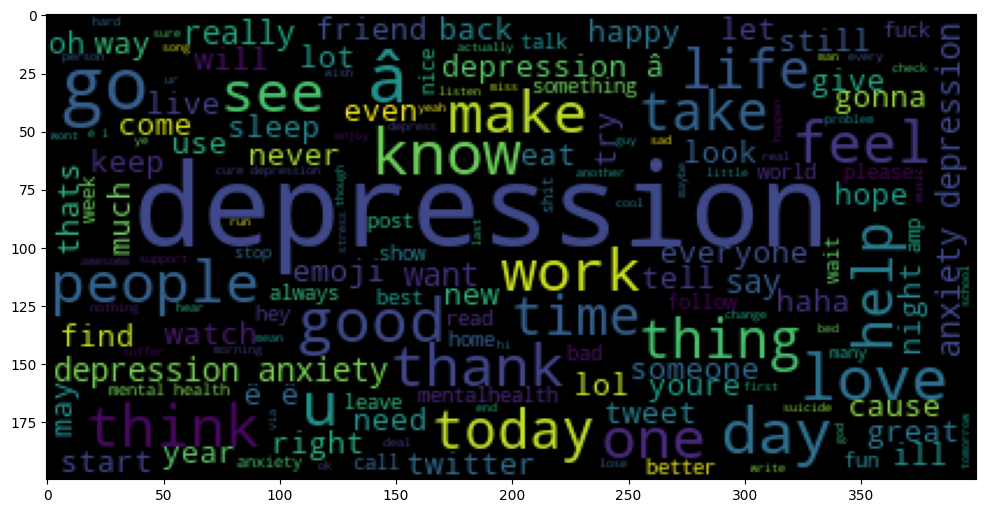

In [64]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(joined_sentences));

In [66]:
new_table['Labels'].value_counts()

Labels
1    2314
0    2314
Name: count, dtype: int64

In [67]:
positive_tweets = new_table[new_table['Labels'] == 0]
positive_sentences = positive_tweets['Tweets'].tolist()
positive_string = " ".join(positive_sentences)

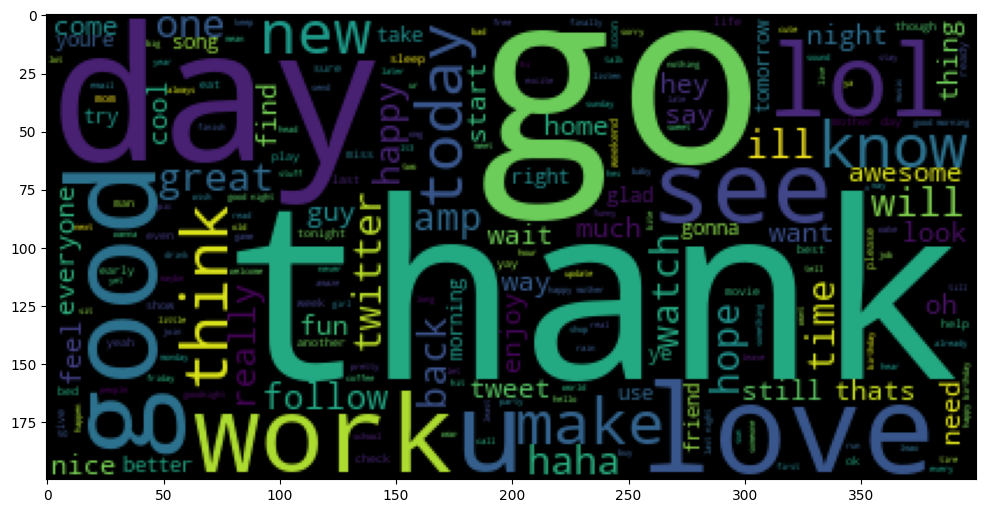

In [68]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(positive_string));

In [69]:
negative_tweets = new_table[new_table['Labels'] == 1]
negative_sentences = negative_tweets['Tweets'].tolist()
negative_string = " ".join(negative_sentences)

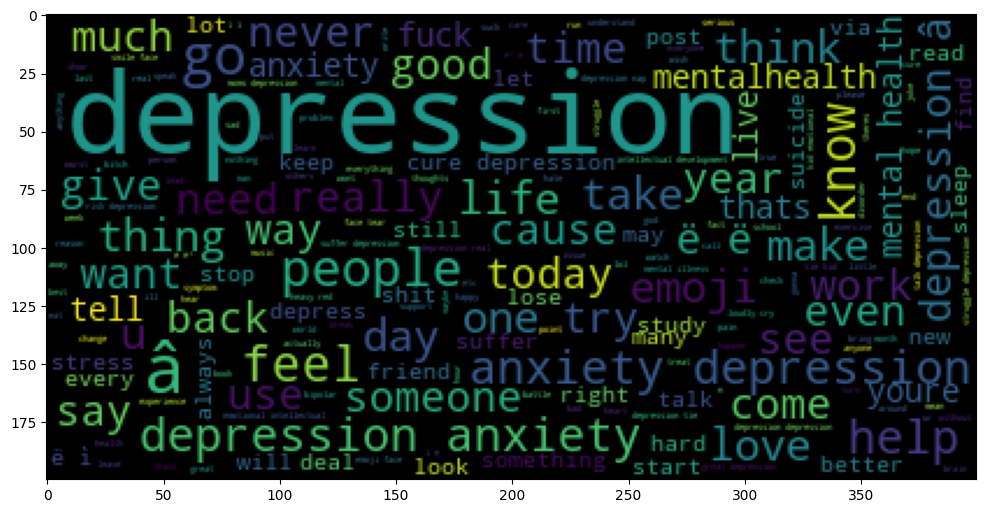

In [70]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(negative_string));

In [77]:
%pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 799.0 kB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.0 MB 5.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.0 MB 6.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/11.0 MB 6.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 5.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 5.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 3.9 MB/s eta 0:00:03
   ------- --

In [78]:
cv = TfidfVectorizer()

In [80]:
tfidf = cv.fit_transform(new_table['Tweets'])

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, new_table['Labels'], test_size = 0.2)


In [85]:
tfX_test





<926x9615 sparse matrix of type '<class 'numpy.float64'>'
	with 8879 stored elements in Compressed Sparse Row format>

In [86]:
tfX_test.shape

(926, 9615)

In [87]:
from sklearn.naive_bayes import MultinomialNB


In [88]:
mnb = MultinomialNB()

In [89]:
mnb.fit(tfX_train, tfy_train)

MultinomialNB()

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy score is : 0.9006479481641468


In [91]:
cf = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])
cf

array([[443,  24],
       [ 68, 391]])

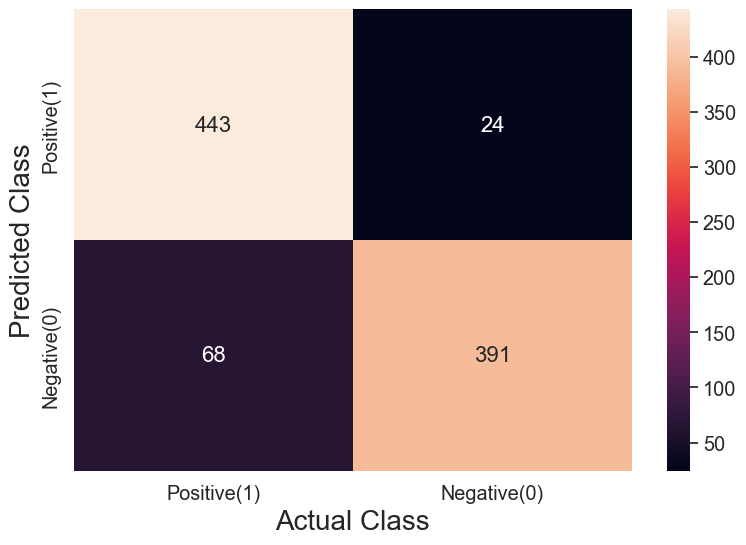

In [99]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (9,6))
sns.set(font_scale=1.3)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()